In [1]:
# Import needed libraries and classes

import os

import matplotlib.pyplot as plt

from Code.RNN.functions.metrics import f1_score
from Code.utils.dataset import Dataset
import Code.utils.store_model as store_model
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding, Input
import numpy as np

# TODO posso usar Tokenizer?
from tensorflow.keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rural\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load datasets

dataset = Dataset('../../Dataset/DatasetsGerados/dataset_training_input.csv',
                  '../../Dataset/DatasetsGerados/dataset_training_output.csv',
                  '../../Dataset/DatasetsGerados/dataset_validation_input.csv',
                  '../../Dataset/DatasetsGerados/dataset_validation_output.csv',
                  '../../Dataset/professor_inputs.csv',
                  '../../Dataset/professor_outputs.csv')

X_train, y_train, X_validation, y_validation, X_test, y_test, ids = dataset.get_datasets_unprocessed('Text', 'Label', sep='\t', rem_punctuation=True)

max_words = 15000
max_len = 500

tokenizer = Tokenizer(num_words=max_words)  # limit to top max_words words
tokenizer.fit_on_texts(X_train.iloc[:, 0])

X_train = tokenizer.texts_to_sequences(X_train.iloc[:, 0])
X_validation = tokenizer.texts_to_sequences(X_validation.iloc[:, 0])
X_test = tokenizer.texts_to_sequences(X_test.iloc[:, 0])

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_validation = preprocessing.sequence.pad_sequences(X_validation, maxlen=max_len)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [3]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

dim_embed = 100
model = Sequential()
model.add(Input((X_train.shape[1],)))
model.add(Embedding(max_words, dim_embed))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_validation,y_validation))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 100)       │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       400,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,900,169 (7.25 MB)

 Trainable params: 1,900,169 (7.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc: 0.4903 - loss: 0.6951 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.4875 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.4966 - loss: 0.6930 - val_acc: 0.6080 - val_loss: 0.6723
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.7099 - loss: 0.6094 - val_acc: 0.9700 - val_loss: 0.3753
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9678 - loss: 0.3525 - val_acc: 0.9880 - val_loss: 0.2958
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.9975 - loss: 0.2860 - val_acc: 0.9790 - val_loss: 0.2588
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - acc: 1.0000 - loss: 0.2402 - val_acc: 0.9810 - val_loss: 0.2214
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 1.0000 - loss: 0.1979 - val_acc: 0.9810 - val_loss: 0.1860
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 1.0000

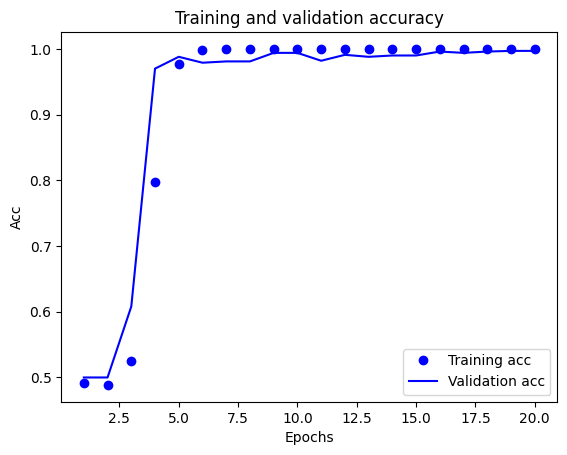

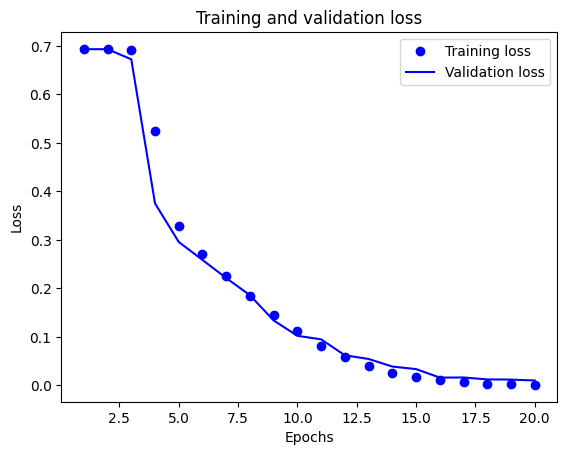

In [4]:
# Plot curves

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# Plot loss curves

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
# Predict output

output = model.predict(X_test)

if y_test is not None:
    # Evaluate Model
    print(model.evaluate(X_test, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.7667 - loss: 1.1800
[1.1799674034118652, 0.7666666507720947]


In [6]:
# Store output

results_filepath = './Results/embedding_results.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(results_filepath), exist_ok=True)

results = dataset.merge_results(ids, output)
results.to_csv(results_filepath, sep='\t', index=False)

In [7]:
# Store network model

model_filepath = './Model/embedding'
model_key = 'embedding'

store_model.store_model(model_filepath, model_key, model)

In [8]:
# Retrieve network model

model_filepath = './Model/embedding'
model_key = 'embedding'

model = store_model.retrieve_model(model_filepath, model_key)

In [9]:
dataset.set_dataset_test('../../Dataset/dataset1_inputs.csv', '../../Dataset/dataset1_outputs.csv')

X_test, y_test, ids = dataset.get_test_dataset_unprocessed('Text', 'Label', sep='\t', rem_punctuation=False)

X_test = tokenizer.texts_to_sequences(X_test.iloc[:, 0])
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)